Koristimo biblioteku **networkx** za rad sa grafovima. Neke funkcije ćemo testirati za graf koji je dat kao primer u radu (https://hal.archives-ouvertes.fr/hal-01166658/document).

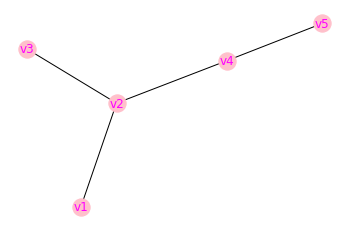

In [284]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import random
%matplotlib inline

G = nx.Graph()
G.add_edge('v4', 'v5')
G.add_edge('v1', 'v2')
G.add_edge('v2', 'v3')
G.add_edge('v2', 'v4')

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_color='pink')
nx.draw_networkx_labels(G,pos,font_color='magenta')
nx.draw_networkx_edges(G,pos,edgelist=G.edges,color='purple')
plt.axis('off')
plt.show()

Funkcija označavanja $f:\{v_1,v_2,...,v_n\} \rightarrow \{1,2,...,n\}$.

Definišemo dve pomoćne funkcije. $labeling\_from\_nodes$ je pomoćna funkcija koja nam od liste čvorova $v_j$ daje listu indeksa $j$ (tj. označavanje tih čvorova).
$nodes\_from\_labeling$ je pomoćna funkcija koja nam od liste indeksa $j$ daje listu čvorova $v_j$ (tj. čvorove na osnovu tog labeliranja).

In [2]:
def labeling_from_nodes(nodes):
    n = len(nodes)
    return [int(nodes[i].strip('v')) for i in range(n)]

def nodes_from_labeling(labeling):
    n = len(labeling)
    return ['v'+str(labeling[i]) for i in range(n)]

Neka je $f(v_1) = 3, f(v_2) = 1, f(v_3) = 2, f(v_4) = 5, f(v_5) = 4 $ (u skladu sa primerom iz rada).

In [3]:
f = [3,1,2,5,4] # v1 -> 3, v2 -> 1, ...
print('Given labeling: ',f)
print('Nodes: ', nodes_from_labeling(sorted(labeling_from_nodes(list(G.nodes)))))
print('Neighbors of a node v2: ',[u for u in G.neighbors('v2')])

Given labeling:  [3, 1, 2, 5, 4]
Nodes:  ['v1', 'v2', 'v3', 'v4', 'v5']
Neighbors of a node v2:  ['v1', 'v3', 'v4']


Definišemo funkciju $label$ koja za dati graf $G$, čvor $node$ i funkciju označavanja $f$ vraća oznaku (labelu) koju tom čvoru dodeljuje funkcija $f$

In [4]:
def label(G, node, f):
    
    index_of_node = int(node.strip('v'))-1
    return f[index_of_node]


In [5]:
print('Label of a node v2 according to f: ', label(G,'v2',f))

Label of a node v2 according to f:  1


Definišemo funkciju $bandwidth\_of\_a\_node$ koja za dati graf $G$, čvor $node$ i funkciju označavanja $f$ izračunava $bandwidth$ tog čvora 

In [6]:
def bandwidth_of_a_node(G, node, f):
    neighbors = [u for u in G.neighbors(node)]
    label_node = label(G,node,f)
    maximum = float('-inf')
    for u in neighbors:
        label_u = label(G,u,f)
        diff = abs(label_u - label_node)
        if diff > maximum:
            maximum = diff
    return maximum

In [7]:
print('Bandwidth of node v2 under labeling f is',bandwidth_of_a_node(G,'v2',f))
print('Bandwidth of node v3 under labeling f is',bandwidth_of_a_node(G,'v3',f))

Bandwidth of node v2 under labeling f is 4
Bandwidth of node v3 under labeling f is 1


Definišemo funkciju $bandwidth$ koja za dati graf $G$ i funkciju označavanja $f$ izračunava $bandwidth$ grafa 

In [8]:
def bandwidth(G, f):
    nodes = [v for v in G.nodes]
    bandwidths = [bandwidth_of_a_node(G,node,f) for node in nodes]
    return max(bandwidths)

In [9]:
print('Bandwidth of the graph G under labeling f is',bandwidth(G,f))
print('Bandwidth of the graph G under identic labeling is',bandwidth(G,[1,2,3,4,5]))

Bandwidth of the graph G under labeling f is 4
Bandwidth of the graph G under identic labeling is 2


Definišemo funkciju $initial\_solution$ koja za dati graf $G$ generiše početno rešenje - početno označavanje $f$ čvorova grafa $G$, koristeći BFS sa nasumičnim izborom čvora od kojeg se započinje pretraga.

In [10]:
def initial_solution(G):
    
    solution = []
    
    for C in nx.connected_components(G):
        source = random.choice(list(C))
        edges_iterator = nx.bfs_edges(G, source)
        edges = [edge for edge in edges_iterator]
        solution = solution + [source] + [edge[1] for edge in edges]
    
    
    return labeling_from_nodes(solution)

In [11]:
initSol = initial_solution(G)
print('Is our initial solution better than previous labeling f?')
if bandwidth(G,initSol) < bandwidth(G,f):
    print('YES!')
else:
    print('NO!')

Is our initial solution better than previous labeling f?
YES!


Definišemo funkciju $distance(f,f_p)$ koja računa rastojanje između rešenja $f$ i $f_p$ na osnovu formule (4) iz rada.

In [12]:
def distance(f,f_p):
    n = len(f)
    dist = 0
    for i in range(n):
        if f[i] != f_p[i]:
            dist += 1
    dist -= 1
    return dist

In [13]:
f_p = [3,2,1,5,4]
f = [4,1,3,2,5]
print('Distance between given solutions is',distance(f,f_p))

Distance between given solutions is 4


Definišemo funkcije $max\_labeled\_neighbor$ i $min\_labeled\_neighbor$ koje za dati graf $G$, čvor $node$ i označavanje $f$ računaju, redom, najveću i najmanju oznaku među čvorovima susednim čvoru $node$

In [14]:
def max_labeled_neighbor(G, node, f):
    neighbors = [u for u in G.neighbors(node)]
    max_label = float('-inf')
    for u in neighbors:
        label_u = label(G,u,f)
        if label_u > max_label:
            max_label = label_u
    return max_label

In [15]:
def min_labeled_neighbor(G, node, f):
    neighbors = [u for u in G.neighbors(node)]
    min_label = float('inf')
    for u in neighbors:
        label_u = label(G,u,f)
        if label_u < min_label:
            min_label = label_u
    return min_label

In [16]:
f = [3,1,2,5,4]
print(max_labeled_neighbor(G,'v2',f))
print(min_labeled_neighbor(G,'v2',f))

5
2


Definišemo funkciju $set\_K$ koja bira podskup čvorova $K$ na osnovu $Initialization$ koraka u $Algorithm 1$ iz rada. 

In [17]:
def set_K(G, f, k):
    nodes = [u for u in G.nodes]
    B = bandwidth(G,f)
    B_p = random.randint(1,B)
    
    K = []
    while True:
        for node in nodes:
            bandwidth_node = bandwidth_of_a_node(G, node, f)
            if bandwidth_node >= B_p:
                K.append(node)
                
        if len(K) >= k:
            break
        else:
            K = []
            B_p = random.randint(1,B)
                
    return K

In [18]:
set_K(G, f, 3)

['v4', 'v1', 'v2']

 Definišemo funkciju $critical\_node$ koja za dati graf $G$, čvor $node$ i označavanje $f$ nalazi čvor $v$ takav da je $ |f(node)-f(v)| = bandwidth\_of\_a\_node(G, node, f) $

In [19]:
def critical_node(G, node, f):

    nodes = [u for u in G.nodes]
    for v in nodes:
        if abs(label(G, node, f) - label(G, v, f)) == bandwidth_of_a_node(G, node, f):
            return v

In [20]:
critical_node(G, 'v4', f)

'v2'

Definišemo pomoćnu funkciju $swap\_labels$ koja menja označavanje $f$ tako što datim čvorovima $u$ i $v$ zameni prethodne oznake.

In [21]:
def swap_labels(G, u, v, f):
    
    label_u = label(G, u, f)
    label_v = label(G, v, f)
    
    index_u = f.index(label_u)
    index_v = f.index(label_v)
    
    f[index_u] = label_v
    f[index_v] = label_u
    
    return f

In [22]:
f = [3,1,2,5,4]
swap_labels(G,'v1','v5',f)

[4, 1, 2, 5, 3]

Definišemo funkciju $shaking$ kojom se realizuje faza razmrdavanja (prema $Algorithm 1$ iz rada)

In [23]:
def shaking(G, f, k):
    
    K = set_K(G, f, k)
    
    edges = [edge for edge in G.edges]
    nodes = [node for node in G.nodes]
    
    for i in range(k):
        u = random.choice(K)
        v = critical_node(G, u, f) 
        
        if (u,v) in edges:
            f_min_u = min_labeled_neighbor(G, u, f)
            f_max_u = max_labeled_neighbor(G, u, f)

            label_v = label(G, v, f)
            
            min_value = float('inf')
            min_w = None
            
            for w in nodes:
                label_w = label(G, w, f)
                if label_w <= f_max_u and label_w >= f_min_u:
                    current_value = max(max_labeled_neighbor(G, w, f) - label_v,label_v - min_labeled_neighbor(G, w, f))
                    
                    if current_value < min_value:
                        min_value = current_value
                        min_w = w
                        
            f = swap_labels(G,v,min_w,f)
            
    return f

In [24]:
f = [3,1,2,5,4]
print(shaking(G,f,3))

[1, 3, 2, 5, 4]


Definišemo funkciju $best\_labeling$ koja za dati čvor $v$ pronalazi najbolju oznaku.

In [25]:
def best_labeling(G, v, f):
    max_v = max_labeled_neighbor(G, v, f)
    min_v = min_labeled_neighbor(G, v, f)
    
    mid_v = (max_v + min_v) // 2
    
    return mid_v

Definišemo funkciju $suitable\_swapping\_nodes$ koja za dati čvor $v$ pronalazi skup čvorova pogodnih za razmenu oznake.

In [26]:
def suitable_swapping_nodes(G, v, f):
    nodes = [u for u in G.nodes]
    mid_v = best_labeling(G, v, f)
    label_v = label(G, v, f)
    N_p = []
    
    for u in nodes:
        label_u = label(G, u, f)
        if abs(mid_v-label_u) < abs(mid_v-label_v):
            N_p.append(u)
            
    return N_p

In [27]:
suitable_swapping_nodes(G,'v1',f)

['v5', 'v2', 'v3']

Definišemo funkciju $number\_of\_critical\_edges$ koja za dati graf $G$ i označavanje $f$ izračunava broj kritičnih grana. Kritična grana je ona grana $(u,v)$ takva da je $bandwidth\_of\_a\_node(G, u, f) = bandwidth(G, f)$ i $bandwidth\_of\_a\_node(G, v, f) = bandwidth(G, f)$

In [28]:
def number_of_critical_edges(G, f):
    
    number = 0
    B = bandwidth(G, f)
    edges = [edge for edge in G.edges]
    
    for edge in edges:
        v_from = edge[0]
        v_to = edge[1]
        
        if bandwidth_of_a_node(G, v_from, f) == B and bandwidth_of_a_node(G, v_to, f) == B:
            number += 1
            
    return number

Definišemo funkciju $local\_search$ kojom se realizuje faza lokalne pretrage (prema $Algorithm 2$ iz rada)

In [29]:
def local_search(G, f):
    
    canImprove = True
    nodes = [u for u in G.nodes]
    
    while canImprove:
        canImprove = False
        
        for v in nodes:
            
            number_of_critical = number_of_critical_edges(G, f)

            if bandwidth_of_a_node(G, v, f) == bandwidth(G, f):
                
                N_p = suitable_swapping_nodes(G,v,f)
                
                for u in N_p:
                    f = swap_labels(G,v,u,f)
                    
                    if number_of_critical_edges(G, f) < number_of_critical:
                        canImprove = True
                        break
                        
                    f = swap_labels(G,v,u,f)
                    
    return f

Definišemo funkciju $number\_of\_critical\_nodes$ koja za dati graf $G$ i označavanje $f$ izračunava broj kritičnih čvorova. Kritični čvor je čvor čiji je $bandwidth$ jednak $bandwidt$h-u grafa, odnosno ima maksimalan $bandwidth$ za dato labeliranje.

In [30]:
def number_of_critical_nodes(G, f):
    
    Vc = set([])
    B = bandwidth(G, f)
    nodes = [u for u in G.nodes]
    
    for u in nodes:
        if bandwidth_of_a_node(G, u, f) == B:
            Vc.add(u)
            
    return len(Vc)

Definišemo funkciju $move$ kojom se realizuje mehanizam 'move or not' (prema $Algorithm 3$ iz rada)

In [31]:
def move(G, f, f_p, alpha):
    
    Move = False
    B_f = bandwidth(G, f)
    B_f_p = bandwidth(G, f_p)
    
    if B_f_p < B_f:
        Move = True
        
    else:
        if B_f == B_f_p:
            if number_of_critical_nodes(G,f_p) < number_of_critical_nodes(G,f) or distance(f, f_p) > alpha:
                Move = True
                
    return Move

Definišemo funkciju $VNS$ kojom se realizuje metod promenljivih okolina (prema $Algorithm 4$ iz rada)

In [32]:
def VNS(G, k_min, k_max, k_step, alpha):

    t = 0
    
    i_max = int((k_max - k_min)/k_step)
    
    f = initial_solution(G)
    f = local_search(G, f)
    i = 0
    k = k_min
    
    while i <= i_max:
        f_p = shaking(G, f, k)
        f_p = local_search(G, f)
        if move(G, f, f_p, alpha):
            f = f_p
            k = k_min
            i = 0
        else:
            k = k + k_step
            i = i + 1
    
    return f

Pomoćna funkcija $generate\_graph$ koja na osnovu broja čvorova $n$ i broja grana $e$ vraća nasumično konstruisan graf.

In [33]:
def generate_graph(n, e):
    
    l = [i for i in range(1,n+1)]
    V = nodes_from_labeling(l)
    G = nx.Graph()
    G.add_nodes_from(V)

    for i in range(e):
        u = random.choice(V)
        v = random.choice(V)
    
        while u == v:
            v = random.choice(V)
        
        G.add_edge(u,v)
        
    return G

Pomoćna funkcija $visualize\_graph$ koja vizualizuje prosleđeni graf.

In [34]:
def visualize_graph(G):
    
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10,10))
    nx.draw_networkx_nodes(G,pos,node_color='pink')
    nx.draw_networkx_labels(G,pos,font_color='magenta')
    nx.draw_networkx_edges(G,pos,edgelist=list(G.edges),color='purple')
    plt.axis('off')
    plt.show()


## Testiranje

### Test 1

In [234]:
n = 30 # broj cvorova, podesavati po zelji
e = 60 # broj grana, podesavati po zelji

# naredni parametri su postavljeni u skladu sa radom
alpha = 10
k_min = 2
k_step = 3
k_max = n//2 

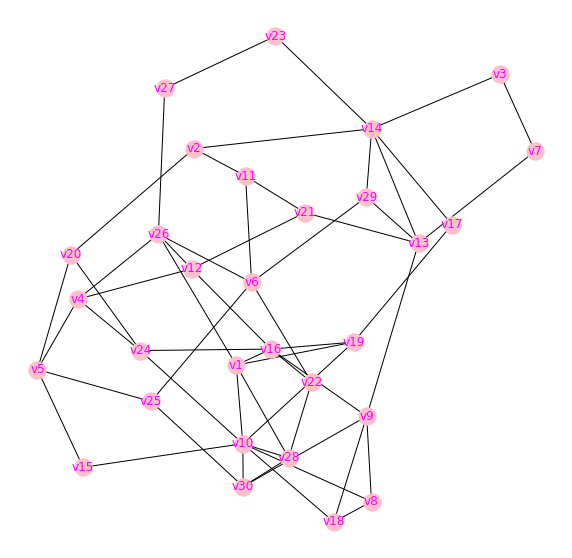

In [235]:
# generisemo i vizualizujemo graf
G = generate_graph(n, e)
visualize_graph(G)

In [236]:
initSol = initial_solution(G)
print('Initial solution bandwidth: ',bandwidth(G, initSol))
f = VNS(G,k_min,k_max,k_step,alpha)
print('Bandwidth of the graph G under such labeling f is ', bandwidth(G, f))

Initial solution bandwidth:  28
Bandwidth of the graph G under such labeling f is  20


### Test 2

In [237]:
n = 50 # broj cvorova, podesavati po zelji
e = 100 # broj grana, podesavati po zelji

# naredni parametri su postavljeni u skladu sa radom
alpha = 10
k_min = 2
k_step = 3
k_max = n//2 

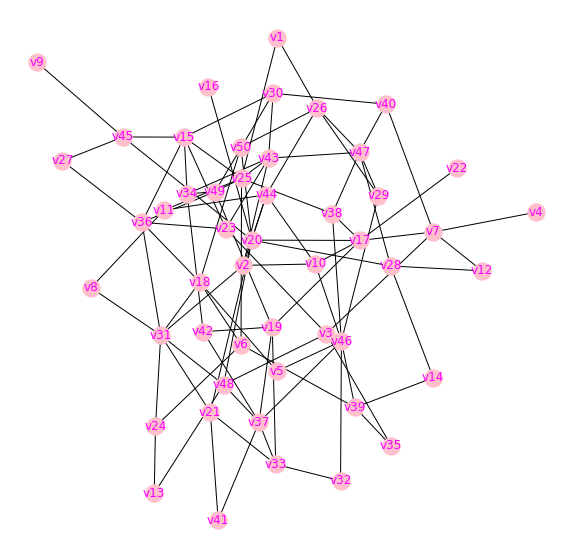

In [238]:
# generisemo i vizualizujemo graf
G = generate_graph(n, e)
visualize_graph(G)

In [239]:
initSol = initial_solution(G)
print('Initial solution bandwidth: ',bandwidth(G, initSol))
f = VNS(G,k_min,k_max,k_step,alpha)
print('Bandwidth of the graph G under such labeling f is ', bandwidth(G, f))

Initial solution bandwidth:  47
Bandwidth of the graph G under such labeling f is  39


### Test 3

In [240]:
n = 100 # broj cvorova, podesavati po zelji
e = 250 # broj grana, podesavati po zelji

# naredni parametri su postavljeni u skladu sa radom
alpha = 10
k_min = 2
k_step = 3
k_max = n//2 

In [241]:
# generisemo i vizualizujemo graf
G = generate_graph(n, e)
#visualize_graph(G)

In [242]:
initSol = initial_solution(G)
print('Initial solution bandwidth: ',bandwidth(G, initSol))
f = VNS(G,k_min,k_max,k_step,alpha)
print('Bandwidth of the graph G under such labeling f is ', bandwidth(G, f))

Initial solution bandwidth:  98
Bandwidth of the graph G under such labeling f is  78


### Test 4


In [243]:
n = 150 # broj cvorova, podesavati po zelji
e = 350 # broj grana, podesavati po zelji

# naredni parametri su postavljeni u skladu sa radom
alpha = 10
k_min = 2
k_step = 3
k_max = n//2 

In [244]:
# generisemo i vizualizujemo graf
G = generate_graph(n, e)
#visualize_graph(G)

In [245]:
initSol = initial_solution(G)
print('Initial solution bandwidth: ',bandwidth(G, initSol))
f = VNS(G,k_min,k_max,k_step,alpha)
print('Bandwidth of the graph G under such labeling f is ', bandwidth(G, f))

Initial solution bandwidth:  145
Bandwidth of the graph G under such labeling f is  113


### Test 5

In [246]:
n = 200 # broj cvorova, podesavati po zelji
e = 500 # broj grana, podesavati po zelji

# naredni parametri su postavljeni u skladu sa radom
alpha = 10
k_min = 2
k_step = 3
k_max = n//2 

In [247]:
# generisemo i vizualizujemo graf
G = generate_graph(n, e)
#visualize_graph(G)

In [248]:
initSol = initial_solution(G)
print('Initial solution bandwidth: ',bandwidth(G, initSol))
f = VNS(G,k_min,k_max,k_step,alpha)
print('Bandwidth of the graph G under such labeling f is ', bandwidth(G, f))

Initial solution bandwidth:  194
Bandwidth of the graph G under such labeling f is  172


## DODATAK - poređenje sa optimalnim rešenjem

In [320]:
import numpy as np
from scipy import sparse as sps
import pandas as pd

In [119]:
def matrix_bandwidth(A):
    n = A.shape[0]
    diffs = []
    
    for i in range(n):
        for j in range(n):
            if A[i][j] != 0:
                diffs.append(np.abs(i-j))
    return max(diffs)       

In [225]:
def graph_from_matrix(A):
    n = A.shape[0]
    nodes = ['v' + str(i+1) for i in range(n)]
    g = nx.Graph()
    g.add_nodes_from(nodes)
    
    for i in range(n):
        for j in range(n):
            if A[i][j] != 0:
                node_i = 'v' + str(i+1)
                node_j = 'v' + str(j+1)
                g.add_edge(node_i, node_j)
            
    #visualize_graph(g)
    return g

## README

**Naš projekat se oslanja na rad koji je naveden na početku sveske. Autori rada su naglasili da algoritam koji su oni (i mi) prezentovali i implementirali ne daje optimalna rešenja, ali je brži od ostalih pristupa koji daju optimalnija rešenja. Stoga, ne očekujemo savršene rezultate, ali je vreme izvršavanja algoritma i za matrice velikih dimenzija razumno, a *bandwidth* u odnosu na dimenziju matrice (grafa) značajno redukovan. **

Kako radimo sa neusmerenim grafovima, matrica povezanosti treba da bude simetrična. Najpre generišemo retku simetričnu matricu sa minimalnim *bandwidth*-om (trakastu matricu). Od nje zatim konstruišemo graf. Očigledno, optimalni *bandwidth* takvog grafa je jednak *bandwidth*-u matrice i dobija se za identičko označavanje čvorova (*v1 -> 1, v2 -> 2*...). Testirajmo koliko dobro označavanje će dati naš algoritam VNS.

*Bandwidth*: 
* tridijagonalne matrice (ne-nula dijagonale: glavna i po jedna ispod i iznad) je 1
* pentadijagonalne matrice (ne-nula dijagonale: glavna i po dve ispod i iznad) je 2
* ...
* n-dijagonalne matrice (ne-nula dijagonale: glavna i po $\frac{n-1}{2}$ ispod i iznad) je $\frac{n-1}{2}$ 

*NAPOMENA 1: Na ovaj način takođe ispitujemo kvalitet dobijenog rešenja jer znamo koje rešenje je optimalno, a izbegavamo permutovanje same matrice i komplikacije koje bi tako nešto povuklo za sobom (zbog izbora koje smo napravili ranije u radu u vezi sa predstavljanjem grafa i funkcije označavanja).*

*NAPOMENA 2: Testiramo za 6 matrica dimenzije do 200 zbog ograničenih računarskih resursa. Za svaku matricu algoritam pokrećemo 5 puta i u tabelu upisujemo najbolji rezultat (po uzoru na testiranje koje su vršili autori rada).*

In [238]:
def generate_band_matrix(size, num_diag):
    
    A = np.diag([1 for i in range(size)])
    K = (num_diag - 1) // 2
    
    for k in range(1,K+1):
            ones = [1 for i in range(size-k)]
            A = A + np.diag(ones, k = k)
            A = A + np.diag(ones, k = -k)
    
    B = matrix_bandwidth(A)
    return A, B

In [286]:
alpha = 10
k_min = 2
k_step = 3

In [334]:
table = dict([])
table['size'] = [48, 57, 100, 147, 161, 200]
table['num_diags'] = [15, 13, 21, 47, 37, 29]
table['best bandwidth'] = []
table['our bandwidth'] = []

In [335]:
for i in range(len(table['size'])):
    
    A, B = generate_band_matrix(table['size'][i],table['num_diags'][i])
    table['best bandwidth'].append(B)
    
    g = graph_from_matrix(A)
    results = []
    k_max = table['size'][i] // 2
    
    for i in range(5):
        vns_sol = VNS(g, k_min, k_max, k_step, alpha)
        results.append(bandwidth(g, vns_sol))

    table['our bandwidth'].append(min(results))    

In [345]:
table

{'best bandwidth': [7, 6, 10, 23, 18, 14],
 'num_diags': [15, 13, 21, 47, 37, 29],
 'our bandwidth': [9, 8, 12, 25, 25, 27],
 'size': [48, 57, 100, 147, 161, 200]}

In [343]:
res = pd.DataFrame(table)
res = res.drop(columns = 'num_diags')

In [344]:
res

,size,best bandwidth,our bandwidth
0,48,7,9
1,57,6,8
2,100,10,12
3,147,23,25
4,161,18,25
5,200,14,27


In [346]:
res['best bandwidth'].mean()

13.0

In [347]:
res['our bandwidth'].mean()

17.666666666666668